In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Load Your Data : 

In [2]:
## reading and storing data
IMG_WIDTH=256
IMG_HEIGHT=256
NO_CHANNELS=3

training = 'training' 
train_imgs = training +"/image_2"
train_labels = training +'/semantic_rgb'         # Path of the Labels Images ( Masks )


test = "testing/image_2"

xtrain_ids = os.listdir(os.path.join(train_imgs))          # to read the images ids
ytrain_ids =os.listdir(os.path.join(train_labels))


test_ids = os.listdir(os.path.join(test))


In [3]:
print('Number of train frames: ' + str(len(os.listdir(train_imgs))))
print('Number of train labels: ' + str(len(os.listdir(train_labels))))

print('Number of test frames: ' + str(len(os.listdir(test))))

print('Total frames: ' + str(len(os.listdir(train_imgs)) + len(os.listdir(train_labels)) + len(os.listdir(test))))

Number of train frames: 200
Number of train labels: 200
Number of test frames: 200
Total frames: 600


## Adjust Mask :

In [4]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(cls2rgb.values()):  # values bte3et el classes el fel dictionary
        
        equality = np.equal(mask, colour)          # 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)     # 256x256 If all True, then True, else False
        semantic_map.append(class_map) # List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)   # 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [5]:
import pandas as pd
classes = pd.read_csv('classes.csv', index_col =0)

classes



,0,1,2
unlabeled,0,0,0
ego vehicle,0,0,0
rectification border,0,0,0
out of roi,0,0,0
static,0,0,0
dynamic,111,74,0
ground,81,0,81
road,128,64,128
sidewalk,244,35,232
parking,250,170,160


In [6]:
n_classes= len(classes)
print(n_classes)

35


In [7]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

In [8]:
cls2rgb

{'unlabeled': [0, 0, 0],
 'ego vehicle': [0, 0, 0],
 'rectification border': [0, 0, 0],
 'out of roi': [0, 0, 0],
 'static': [0, 0, 0],
 'dynamic': [111, 74, 0],
 'ground': [81, 0, 81],
 'road': [128, 64, 128],
 'sidewalk': [244, 35, 232],
 'parking': [250, 170, 160],
 'rail track': [230, 150, 140],
 'building': [70, 70, 70],
 'wall': [102, 102, 156],
 'fence': [190, 153, 153],
 'guard rail': [180, 165, 180],
 'bridge': [150, 100, 100],
 'tunnel': [150, 120, 90],
 'pole': [153, 153, 153],
 'polegroup': [153, 153, 153],
 'traffic light': [250, 170, 30],
 'traffic sign': [220, 220, 0],
 'vegetation': [107, 142, 35],
 'terrain': [152, 251, 152],
 'sky': [70, 130, 180],
 'person': [220, 20, 60],
 'rider': [255, 0, 0],
 'car': [0, 0, 142],
 'truck': [0, 0, 70],
 'bus': [0, 60, 100],
 'caravan': [0, 0, 90],
 'trailer': [0, 0, 110],
 'train': [0, 80, 100],
 'motorcycle': [0, 0, 230],
 'bicycle': [119, 11, 32],
 'license plate': [0, 0, 142]}

## Now let's visualize and explore some samples:

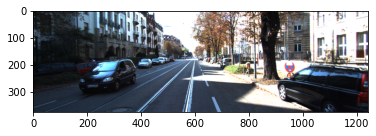

In [9]:
from keras.preprocessing import image     
import cv2
import matplotlib.pyplot as plt


img = image.load_img(train_imgs+ "/000000_10.png")
plt.imshow(img)

## Let's have a look on the masks (the ground truth)  ( Labels ) 


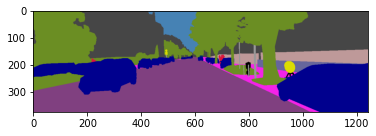

In [10]:
mask  = image.load_img(train_labels+ "/000000_10.png")
plt.imshow(mask)

In [11]:
import numpy as np
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.
mask.shape

(375, 1242, 3)

In [12]:
new_mask = adjust_mask(mask)

In [13]:
new_mask.shape

(375, 1242, 35)

In [14]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}
idx2rgb

{0: array([0, 0, 0]),
 1: array([0, 0, 0]),
 2: array([0, 0, 0]),
 3: array([0, 0, 0]),
 4: array([0, 0, 0]),
 5: array([111,  74,   0]),
 6: array([81,  0, 81]),
 7: array([128,  64, 128]),
 8: array([244,  35, 232]),
 9: array([250, 170, 160]),
 10: array([230, 150, 140]),
 11: array([70, 70, 70]),
 12: array([102, 102, 156]),
 13: array([190, 153, 153]),
 14: array([180, 165, 180]),
 15: array([150, 100, 100]),
 16: array([150, 120,  90]),
 17: array([153, 153, 153]),
 18: array([153, 153, 153]),
 19: array([250, 170,  30]),
 20: array([220, 220,   0]),
 21: array([107, 142,  35]),
 22: array([152, 251, 152]),
 23: array([ 70, 130, 180]),
 24: array([220,  20,  60]),
 25: array([255,   0,   0]),
 26: array([  0,   0, 142]),
 27: array([ 0,  0, 70]),
 28: array([  0,  60, 100]),
 29: array([ 0,  0, 90]),
 30: array([  0,   0, 110]),
 31: array([  0,  80, 100]),
 32: array([  0,   0, 230]),
 33: array([119,  11,  32]),
 34: array([  0,   0, 142])}

## To Convert the mask Back   from 32 channels  to 3 channels only like the original  

In [15]:
# Map the idx back to rgb          # Hena  3lsh 
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))  

## -1 means 3adad el masks kolha 

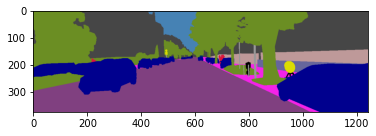

In [16]:
plt.imshow(rgb_mask)

In [17]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.applications.vgg16 import VGG16

img_size=256
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=(256,256,3))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model





In [18]:
# Build model
model = get_model(img_size, n_classes)
iou = tf.keras.metrics.MeanIoU(n_classes, name=None, dtype=None)
model.compile(optimizer =tf.keras.optimizers.RMSprop(1e-4) , loss = 'categorical_crossentropy', metrics = [iou,'accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

## Loading Train Data :

In [19]:
from keras.preprocessing.image import load_img
def load_raw_CAMVID(data_type='training', enc='ohe', shape='normal'):
    img_path = data_type + '/image_2'+ "/"
    labels_path = data_type + '/semantic_rgb/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
    x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
    
    if(enc=='ohe'):
    
        y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
    return x, y

## Notee : we did do the adjust Mask Here on ( y ) because we will do it in the Generator function 

In [20]:
import time
start = time.time()
X_train, Y_train = load_raw_CAMVID(data_type='training')           # load camvid returns x , y  , x for xTrain , y for yTrain


end = time.time()
print('Time elapsed: ', end-start)

Time elapsed:  3.2797718048095703


## Split the Training Dataa  to Train - Validation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val , Y_train , Y_val =  train_test_split(X_train,
                                                 Y_train,
                                                test_size=0.1,
                                                random_state = 42)

In [22]:
print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

(180, 256, 256, 3)
(180, 256, 256, 3)
(20, 256, 256, 3)
(20, 256, 256, 3)


## Loading Test Data 

In [23]:
from keras.preprocessing.image import load_img
def load_raw_CAMVID(data_type='testing', enc='ohe', shape='normal'):
    img_path = data_type + '/image_2/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
    x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
    
    return x

## Notee : we did do the adjust Mask Here on ( y ) because we will do it in the Generator function 

In [24]:
start = time.time()
X_test = load_raw_CAMVID(data_type='testing')  
end = time.time()
print('Time elapsed: ', end-start)

Time elapsed:  2.1927390098571777


## -----------#############_----------Data Augmantation ------------###### 

## for training :

In [25]:
# Data generator
batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #rescale=1./255)# Data is already scaled when loaded

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    X_train,
    seed=seed,
    batch_size=batch_sz)

mask_generator = mask_datagen.flow( 
    Y_train,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)



In [26]:
def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow(
    X_val,
    seed=seed,
    batch_size=batch_sz)

val_mask_generator = mask_datagen.flow(
    Y_val,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  


In [27]:

batch_sz = 4


In [28]:
from keras.callbacks import ReduceLROnPlateau ,EarlyStopping ,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy", 
    patience = 4,
    verbose = 1, 
    factor = 0.5, 
    min_lr = 0.000000001
)

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    mode = "max",
)

checkpoint = ModelCheckpoint(
    monitor = "val_accuracy",
    filepath = "Xeption_Unet.hdf5",
    verbose = 1,
    save_best_only = True, 
    save_weights_only = True
)
callbacks= [reduce_lr]

In [29]:
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=len(X_train)//batch_sz,
                    validation_steps=len(X_val)//batch_sz,
                    epochs=30,
                    callbacks=callbacks)

<ipython-input-29-f48a17db77e2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator_fn(),


Epoch 1/30
45/45 [==============================] - 25s 320ms/step - loss: 2.8696 - mean_io_u: 0.4856 - accuracy: 0.5026 - val_loss: 3.7426 - val_mean_io_u: 0.4852 - val_accuracy: 0.1229 - lr: 1.0000e-04
Epoch 2/30
45/45 [==============================] - 14s 303ms/step - loss: 2.0013 - mean_io_u: 0.4853 - accuracy: 0.5827 - val_loss: 3.4588 - val_mean_io_u: 0.4853 - val_accuracy: 0.1600 - lr: 1.0000e-04
Epoch 3/30
45/45 [==============================] - 13s 300ms/step - loss: 1.9475 - mean_io_u: 0.4852 - accuracy: 0.6139 - val_loss: 3.5775 - val_mean_io_u: 0.4849 - val_accuracy: 0.1557 - lr: 1.0000e-04
Epoch 4/30
45/45 [==============================] - 13s 299ms/step - loss: 2.1994 - mean_io_u: 0.4852 - accuracy: 0.6202 - val_loss: 2.9815 - val_mean_io_u: 0.4853 - val_accuracy: 0.2429 - lr: 1.0000e-04
Epoch 5/30
45/45 [==============================] - 13s 299ms/step - loss: 2.3879 - mean_io_u: 0.4853 - accuracy: 0.6260 - val_loss: 3.1940 - val_mean_io_u: 0.4851 - val_accuracy: 0.22

In [38]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
    plt.figure(1)
  
  # Img
    plt.subplot(311)
    plt.imshow(img)
  
  # Predict
    pred_mask = model.predict(np.expand_dims(img, 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    if shape=='flat':
        pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
    rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
    plt.subplot(312)
    plt.imshow(rgb_mask)
              
  # GT mask
    if gt_mode == 'ohe':
        gt_img_ohe = np.argmax(gt_mask, axis=-1)
        gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
    plt.subplot(313)
    plt.imshow((gt_mask).astype(np.uint8))

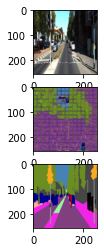

In [39]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')